In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from datetime import datetime, timedelta
import io
plt.rcParams["figure.figsize"] = (12,7)
import statsmodels.api as sm
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data**
I decided to use pfizer, microstrategy and (придумать)
# **Ideas**


# Data collection

In [ ]:
class YahooData:
  def fetch(ticker, start, end, frequency, events, include_adj_close = 'true'):
    """
    ticker: <str>
      name of the stock
    start/end: <str>
      interval of dates period in format 'yyyy-mm-dd'
    frequency: <str>
      the step of the table: 1d, 1wk, 1mo
    events: <str>
      what kind of data you need: history/splits/capitalGain/div
    include_adj_close: <str>
      true/false for including adjusted close price
      not bool because you add it as a part of str
    """
    headers ={'User-agent': 'Mozilla/5.0'}

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&events"+str(events) +"&includeAdjustedClose=" + str(include_adj_close)
    
    r = requests.get(url, headers=headers)
    df = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return df

In [ ]:
apple = YahooData.fetch("Aapl", start="2020-01-01", end="2021-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true' )
apple = apple.reset_index()

In [ ]:
snp = YahooData.fetch("SPY", start="2020-01-01", end="2021-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
snp = snp.reset_index()

In [ ]:
nike = YahooData.fetch("NKE", start="2020-01-01", end="2021-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
nike = nike.reset_index()

In [ ]:
pepsi = YahooData.fetch("PEP", start="2020-01-01", end="2021-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
pepsi = pepsi.reset_index()

In [ ]:
jnj = YahooData.fetch("JNJ", start="2018-01-01", end="2022-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
jnj = jnj.reset_index()

In [ ]:
deere = YahooData.fetch("DE", start="2020-01-01", end="2021-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
deere = deere.reset_index()

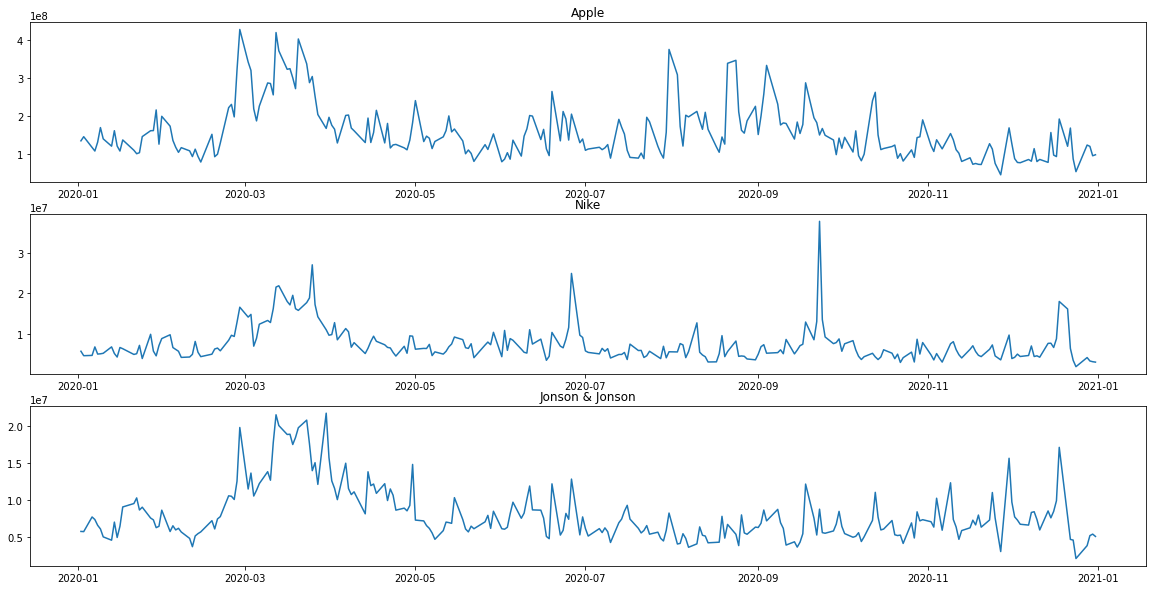

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (20,10))
ax[0].title.set_text('Apple')
ax[0].plot(apple['Date'],apple["Volume"])
ax[1].title.set_text('Nike')
ax[1].plot(nike['Date'],nike["Volume"])
ax[2].title.set_text('Jonson & Jonson')
ax[2].plot(jnj['Date'],jnj["Volume"])
plt.show()

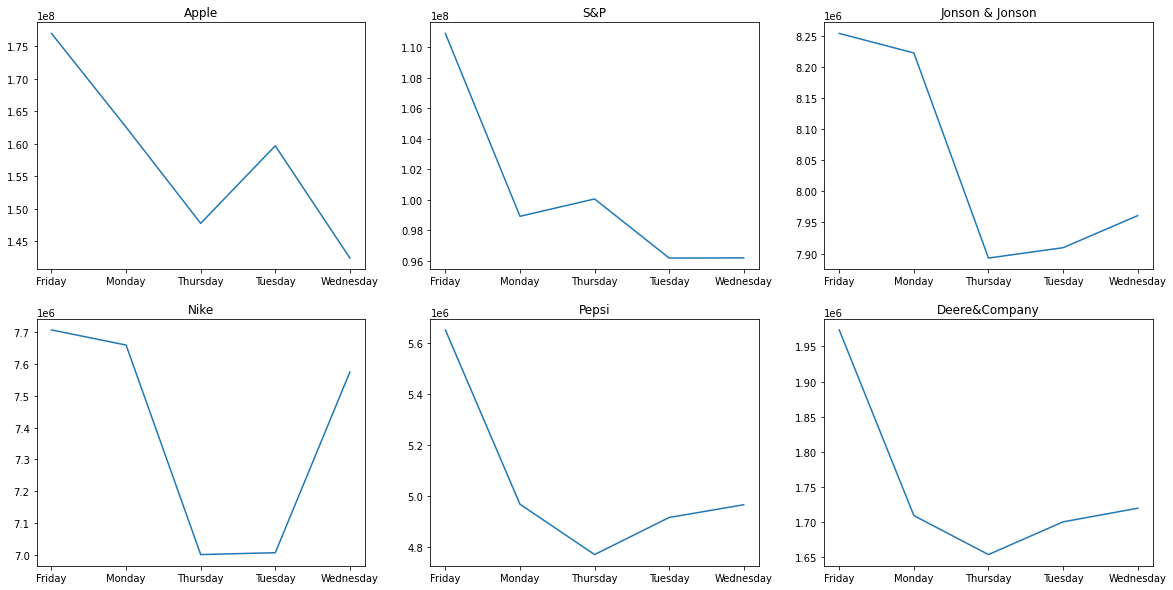

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].title.set_text('Apple')
ax[0,0].plot(apple["Volume"].groupby(apple['Date'].dt.day_name()).mean())
ax[0,1].title.set_text('S&P')
ax[0,1].plot(snp["Volume"].groupby(snp['Date'].dt.day_name()).mean())
ax[1,0].title.set_text('Nike')
ax[1,0].plot(nike["Volume"].groupby(nike['Date'].dt.day_name()).mean())
ax[1,1].title.set_text('Pepsi')
ax[1,1].plot(pepsi["Volume"].groupby(pepsi['Date'].dt.day_name()).mean())
ax[0,2].title.set_text('Jonson & Jonson')
ax[0,2].plot(jnj["Volume"].groupby(jnj['Date'].dt.day_name()).mean())
ax[1,2].title.set_text('Deere&Company')
ax[1,2].plot(deere["Volume"].groupby(deere['Date'].dt.day_name()).mean())
plt.show()

In [ ]:
tXY["Close"][300000:].plot(legend=True)
shifted = sma1 = tXY['Close'][300000:].rolling(100).mean().plot(legend=True)
shifted.legend(['Close','Close_SMA'])
plt.show()

# Pre-processing 

In [ ]:
jnj["Friday_log"] = jnj['Date'].apply(lambda x: 1 if x.day_name() == "Friday" else 0)
apple["Friday_log"] = apple['Date'].apply(lambda x: 1 if x.day_name() == "Friday" else 0)
nike["Friday_log"] = nike['Date'].apply(lambda x: 1 if x.day_name() == "Friday" else 0)

In [ ]:
jnj['moving_average'] = jnj['Volume'].rolling(window=3).mean()
jnj = jnj.dropna()

In [ ]:
jnj = jnj.dropna()

In [ ]:
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
q = jnj['Volume'].values
p = jnj['Close'].values
jnj = jnj.assign(vwap=(p * q).cumsum() / q.cumsum())

In [ ]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)

In [ ]:
import datetime as dt
jnj['Date'] = pd.to_datetime(jnj['Date'])
jnj['Date']= jnj['Date'].map(dt.datetime.toordinal)

# Prediction

### OLS

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


In [ ]:
X = jnj.drop("Volume", axis = 1)
model = sm.OLS(jnj['Volume'],X.astype(float))
result = model.fit()

In [ ]:
print(result.summary()) # окно три простсо

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              954.8
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   7.38e-179
Time:                        22:30:41   Log-Likelihood:                         -3934.7
No. Observations:                 251   AIC:                                      7885.
Df Residuals:                     243   BIC:                                      7914.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              655.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   1.39e-148
Time:                        22:38:02   Log-Likelihood:                         -4047.8
No. Observations:                 253   AIC:                                      8108.
Df Residuals:                     247   BIC:                                      8129.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              729.7
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   2.19e-169
Time:                        22:51:51   Log-Likelihood:                         -3936.4
No. Observations:                 250   AIC:                                      7891.
Df Residuals:                     241   BIC:                                      7923.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### LSTM

Let's try LSTM model (https://www.frontiersin.org/articles/10.3389/frai.2019.00021/full)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, RNN, LSTM, TimeDistributed
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
jnj.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Friday_log,moving_average,vwap
2,2018-01-04,140.449997,141.139999,140.220001,140.550003,126.379532,4837600,0,5.676733e+06,140.550003
3,2018-01-05,140.690002,141.820007,140.279999,141.710007,127.422569,6158800,1,5.448967e+06,141.199691
4,2018-01-08,141.699997,142.000000,140.919998,141.889999,127.584427,5129800,0,5.375400e+06,141.419281
5,2018-01-09,142.369995,145.679993,142.259995,144.139999,129.607605,8897000,0,6.728533e+06,142.386632
6,2018-01-10,143.550003,144.160004,143.320007,143.970001,129.454727,6558600,0,6.861800e+06,142.715451


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
import datetime as dt
jnj['Date'] = pd.to_datetime(jnj['Date'])
jnj['Date']= jnj['Date'].map(dt.datetime.toordinal)

In [ ]:
jnj.shape

(1006, 10)

In [ ]:
X = jnj.drop("Volume", axis = 1)
Y = jnj["Volume"]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler.fit_transform(X)

In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(X):
        X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = Y[:len(train_index)].values.ravel(), Y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = Y[:800], Y[800:]

In [ ]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
Init = keras.initializers.GlorotUniform(seed=0)

model = keras.models.Sequential()

model.add(LSTM(100, 
               return_sequences=True, 
               name='LSTM1', input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_initializer=Init,recurrent_initializer=Init, activation = "relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))

model.add(Dense(1,  kernel_initializer=Init))

In [ ]:
%%time
model.summary()
model.compile(optimizer='adam', loss='mae')


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM1 (LSTM)                (None, 1, 100)            44000     
                                                                 
 dense_34 (Dense)            (None, 1, 100)            10100     
                                                                 
 dense_35 (Dense)            (None, 1, 1)              101       
                                                                 
Total params: 54,201
Trainable params: 54,201
Non-trainable params: 0
_________________________________________________________________
CPU times: user 17.3 ms, sys: 0 ns, total: 17.3 ms
Wall time: 18.9 ms


In [ ]:

hist = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 6743707.0000
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4304819.0000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 1471033.5000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1331890.7500
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1313116.2500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1314276.7500
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1314153.0000
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 1312118.6250
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 1318384.5000
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 1307341.1250
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 1309085.5000
Epoch 12/100
25/25 [==============================] 

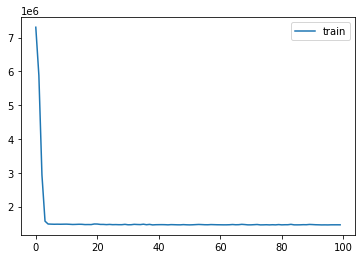

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.legend()
plt.show()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred = np.reshape(y_pred,(1, -1))

In [ ]:
y_test.values

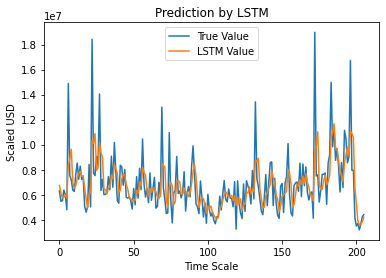

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test.values, label='True Value')
plt.plot(y_pred[0], label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

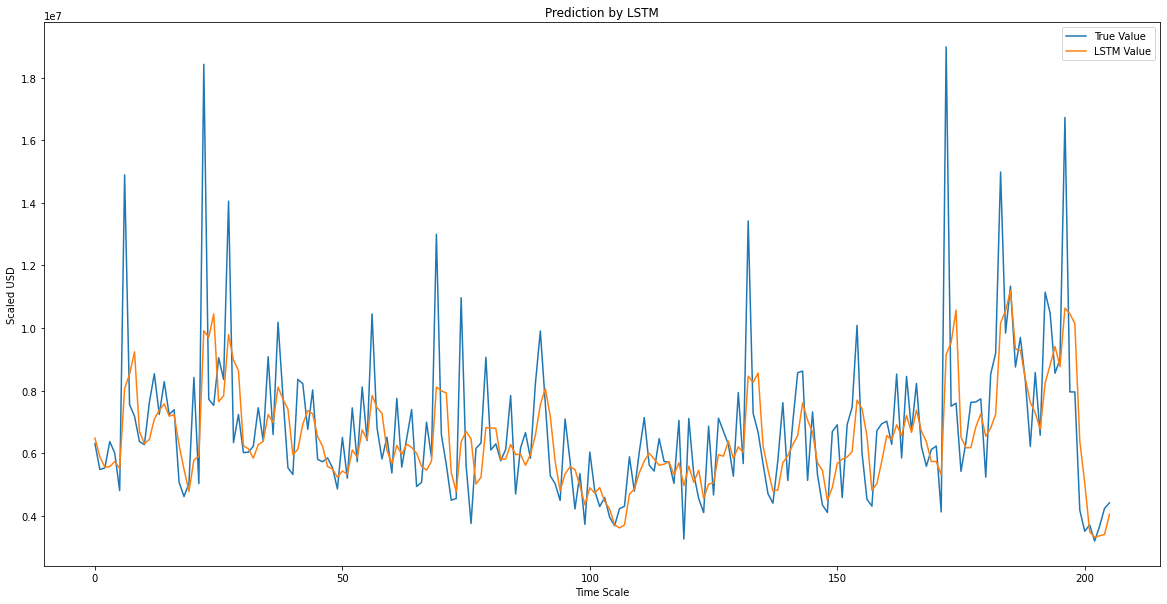

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.figure(figsize = (20,10))
plt.plot(y_test.values, label='True Value')
plt.plot(y_pred[0], label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

Arcticles :
1. https://www.frontiersin.org/articles/10.3389/frai.2019.00021/full
1. https://flextrade.com/wp-content/uploads/2015/01/Predicting-Intraday-Trading-Volume-and-Percentages.pdf
1. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1393993
1. https://dl.acm.org/doi/10.1145/3440054.3440063
1. https://jot.pm-research.com/content/6/3/61
1. https://www.shs-conferences.org/articles/shsconf/abs/2021/03/shsconf_glob20_02010/shsconf_glob20_02010.html